# 2.3 Comparing Plotting Libraries and Declarative Visualizations

In [18]:
from plotnine import *
from matplotlib import pyplot as plt
from plotnine import data
import plotly.express as px
import seaborn as sns

In [19]:
mpg = data.mpg

## Bar Chart

In [20]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


Text(0.5, 1.0, 'Number of Cars by Make')

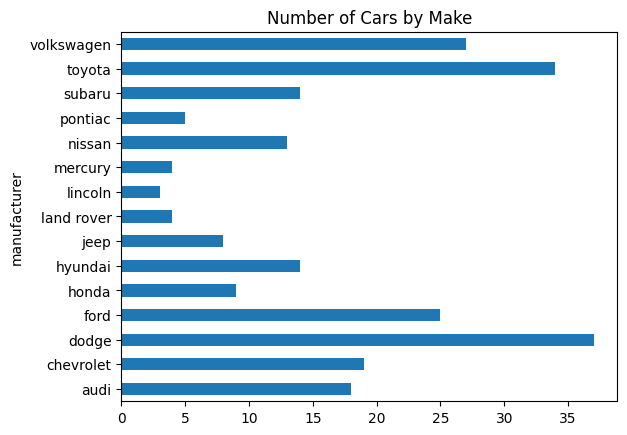

In [21]:
# Pandas
(mpg['manufacturer']
 .value_counts(sort=False)
 .plot.barh()
 .set_title('Number of Cars by Make')
)

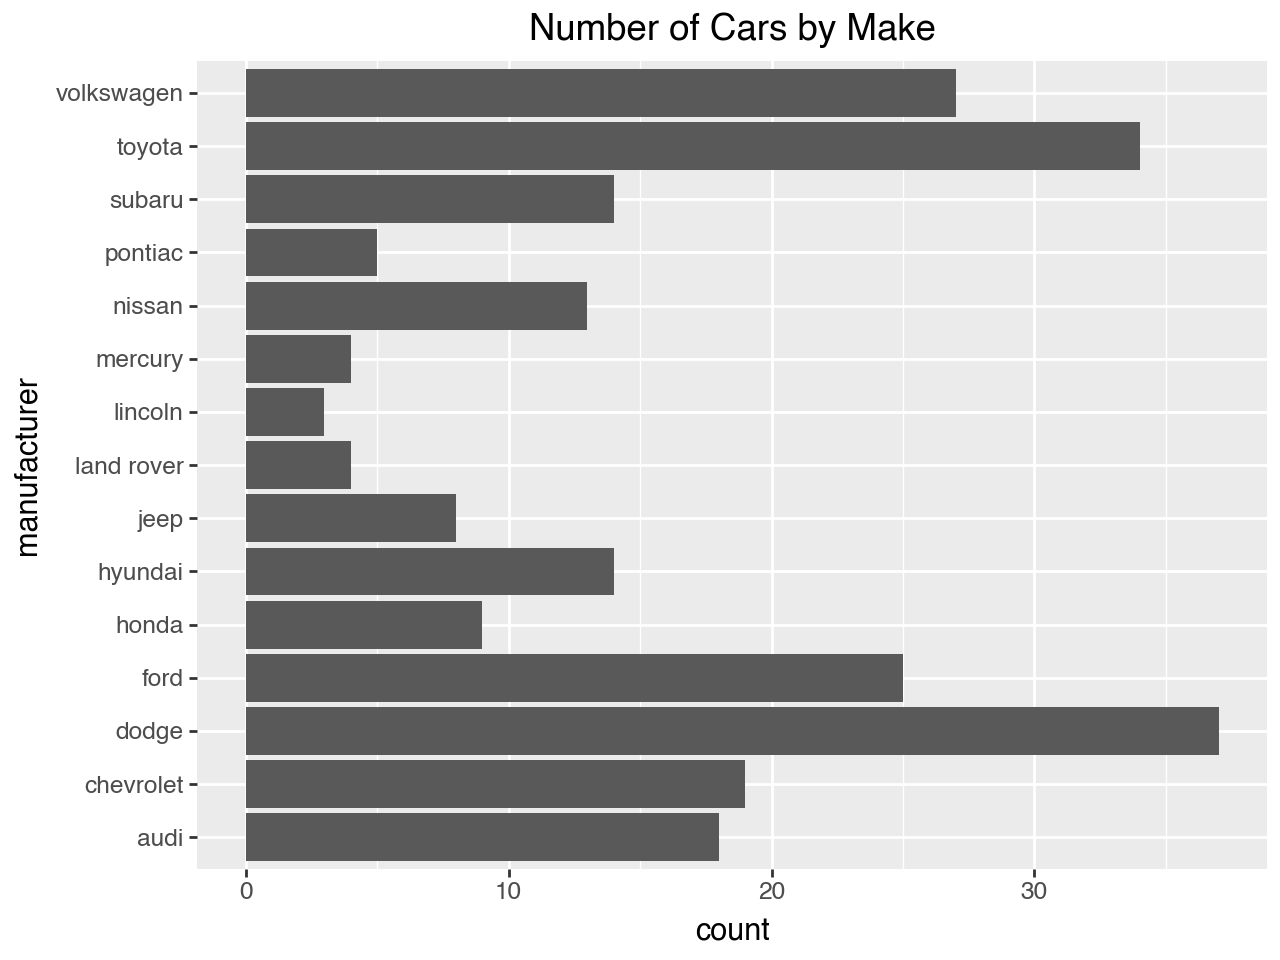

In [22]:
# Plotnine (ggplot2 clone)
(ggplot(mpg) + 
   aes(x='manufacturer') +
   geom_bar() + 
   coord_flip() +
   ggtitle('Number of Cars by Make')
)

In [23]:
fig = px.bar(
    mpg.groupby('manufacturer', observed=False).size().reset_index(name='count'),
    x='count',
    y='manufacturer',
    orientation='h',
    title='Number of Cars by Make',
)

fig

## Scatter Plot

<Axes: xlabel='displ', ylabel='hwy'>

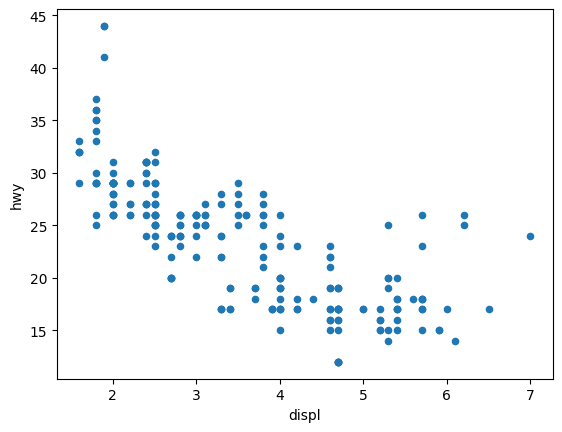

In [24]:
(mpg.
    plot.
    scatter(x='displ', y='hwy'))

In [25]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


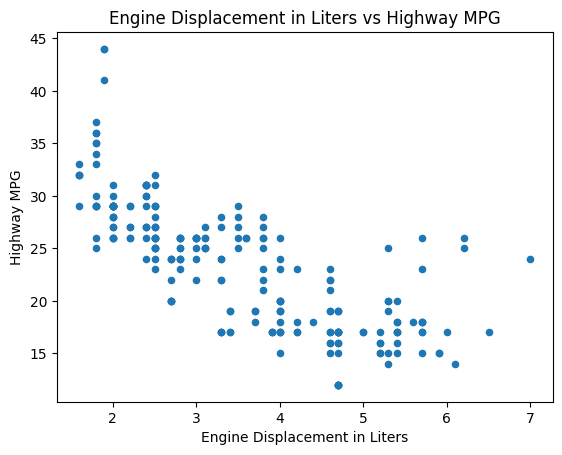

In [26]:
(mpg
 .plot
 .scatter(x='displ', y='hwy')
 .set(title='Engine Displacement in Liters vs Highway MPG',
      xlabel='Engine Displacement in Liters',
      ylabel='Highway MPG'));

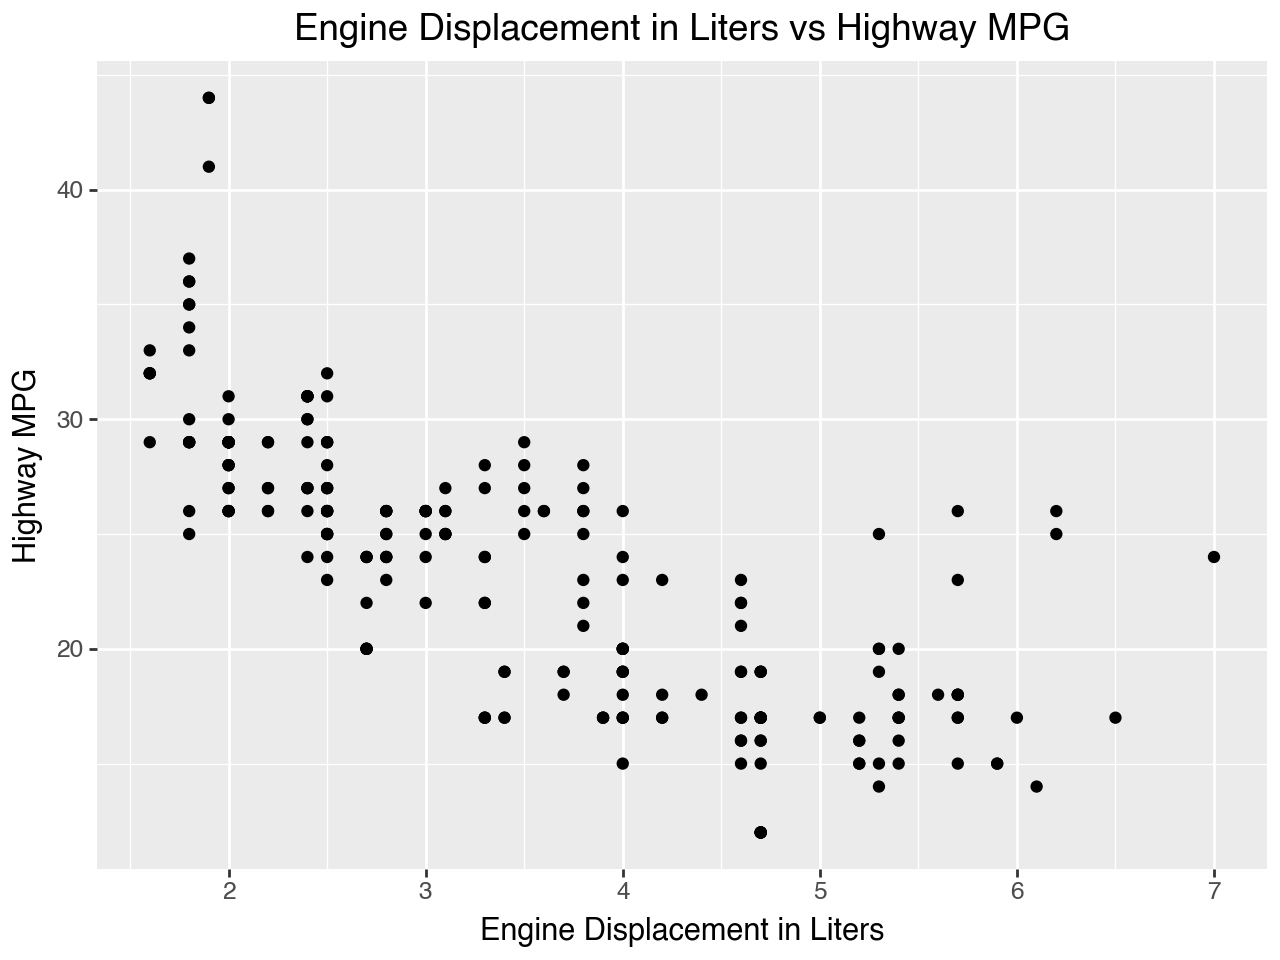

In [27]:
(ggplot(mpg) +
    aes(x = 'displ', y = 'hwy') +
    geom_point() + 
    ggtitle('Engine Displacement in Liters vs Highway MPG') +
    xlab('Engine Displacement in Liters') +
    ylab('Highway MPG')
)

In [28]:
fig = px.scatter(
    mpg,
    x='displ',
    y='hwy',
    title='Engine Displacement in Liters vs Highway MPG',
    labels={
        'displ': 'Engine Displacement in Liters',
        'hwy': 'Highway MPG'
    }
)

fig.show()

## Scatter Plot, Faceted with Color

/var/folders/8m/h9p4w9xx385dnwz_x2453dyc0000gn/T/ipykernel_4109/2769678361.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



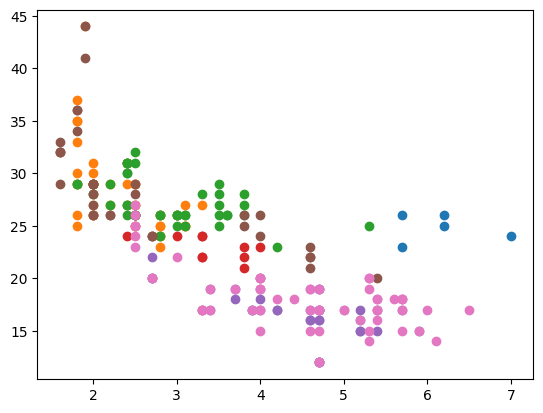

In [29]:
for c, df in mpg.groupby('class'):
    plt.scatter(df['displ'], df['hwy'], label=c)


/var/folders/8m/h9p4w9xx385dnwz_x2453dyc0000gn/T/ipykernel_4109/1913448170.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



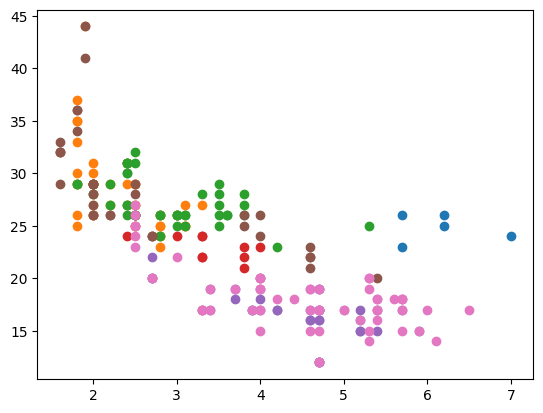

In [30]:
fig, ax = plt.subplots()
for c, df in mpg.groupby('class'):
    plt.scatter(df['displ'], df['hwy'], label=c)

/var/folders/8m/h9p4w9xx385dnwz_x2453dyc0000gn/T/ipykernel_4109/3535434989.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Text(0, 0.5, 'Highway MPG')

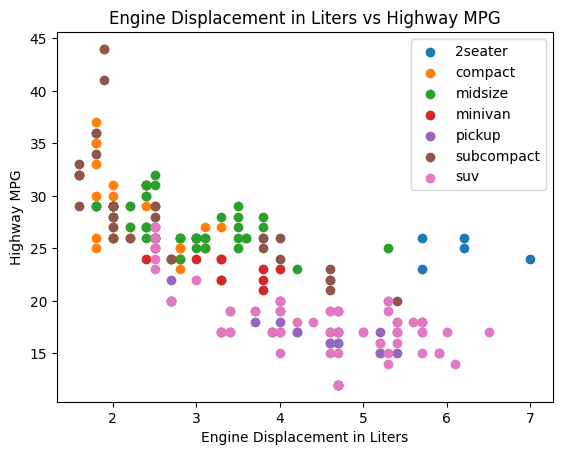

In [31]:
fig, ax = plt.subplots()
for c, df in mpg.groupby('class'):
    ax.scatter(df['displ'], df['hwy'], label=c)
ax.legend()
ax.set_title('Engine Displacement in Liters vs Highway MPG')
ax.set_xlabel('Engine Displacement in Liters')
ax.set_ylabel('Highway MPG')

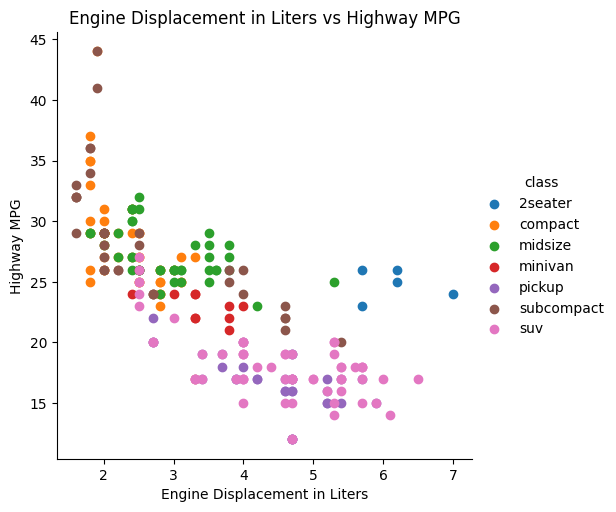

In [32]:
(sns
 .FacetGrid(mpg, hue='class', height=5)
 .map(plt.scatter, 'displ', 'hwy')
 .add_legend()
 .set(
    title='Engine Displacement in Liters vs Highway MPG',
    xlabel='Engine Displacement in Liters',
    ylabel='Highway MPG'
))

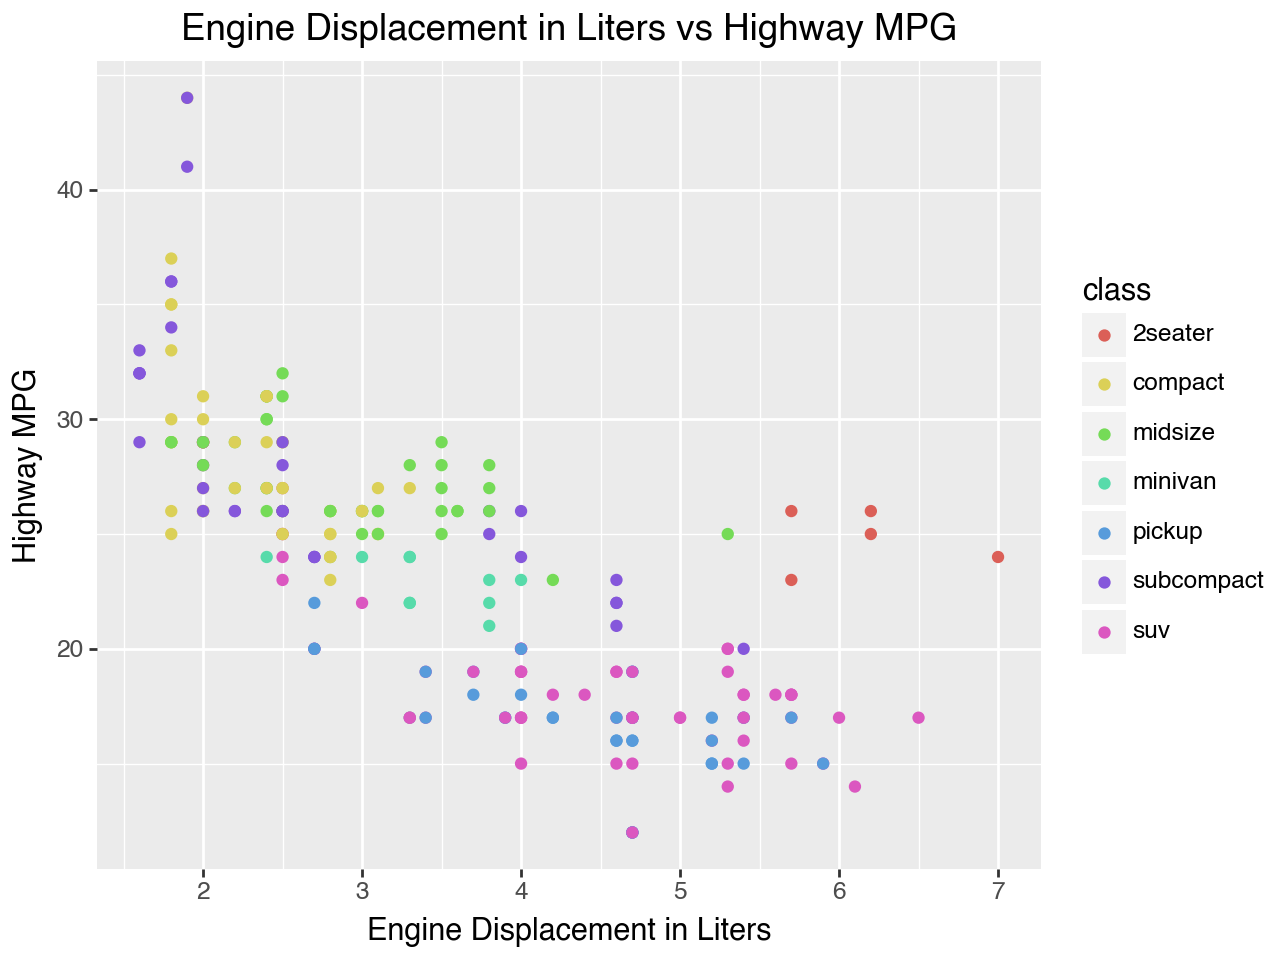

In [33]:
(ggplot(mpg) + 
    aes(x = 'displ', y = 'hwy', color = 'class') +
    geom_point() + 
    ggtitle('Engine Displacement in Liters vs Highway MPG') +
    xlab('Engine Displacement in Liters') +
    ylab('Highway MPG'))

In [34]:
fig = px.scatter(
    mpg,
    x='displ',
    y='hwy',
    color='class',
    title='Engine Displacement in Liters vs Highway MPG',
    labels={
        'displ': 'Engine Displacement in Liters',
        'hwy': 'Highway MPG',
        'class': 'Vehicle Class'
    }
)

fig.show()